<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# AutoEncoders sur des Données Image

## Les Données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

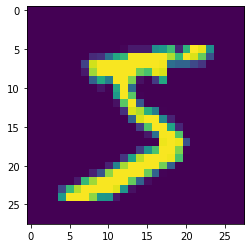

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Les Bases de l'AutoEncoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2485 - accuracy: 0.0895 - val_loss: 0.2107 - val_accuracy: 0.1279
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1825 - accuracy: 0.1634 - val_loss: 0.1570 - val_accuracy: 0.1833
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1525 - accuracy: 0.2045 - val_loss: 0.1437 - val_accuracy: 0.2130
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1435 - accuracy: 0.2200 - val_loss: 0.1364 - val_accuracy: 0.2268
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1361 - accuracy: 0.2308 - val_loss: 0.1369 - val_accuracy: 0.2230


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

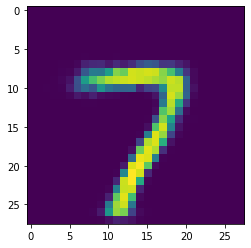

In [ ]:
plt.imshow(passed_images[0])

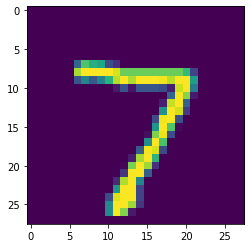

In [ ]:
plt.imshow(X_test[0])

# AutoEncoders pour le Débruitage des Images

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



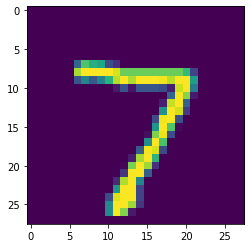

In [ ]:
plt.imshow(X_test[0])

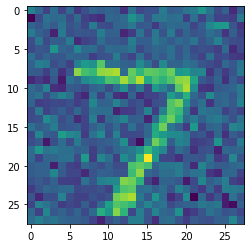

In [ ]:
plt.imshow(noisey[0])

### Créer un auto-encodeur de suppression de bruit et l'entraîner

In [ ]:
import tensorflow as tf

In [ ]:
# Créer exactement le même bruit que la formation (facultatif)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Ajouter du bruit aux images avant de passer par l'auto-encodeur
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1688 - accuracy: 0.1827 - val_loss: 0.1344 - val_accuracy: 0.2230
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1288 - accuracy: 0.2320 - val_loss: 0.1197 - val_accuracy: 0.2465
Epoch 3/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1198 - accuracy: 0.2472 - val_loss: 0.1134 - val_accuracy: 0.2583
Epoch 4/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1149 - accuracy: 0.2564 - val_loss: 0.1093 - val_accuracy: 0.2650
Epoch 5/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1114 - accuracy: 0.2639 - val_loss: 0.1061 - val_accuracy: 0.2665
Epoch 6/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1087 - accuracy: 0.2682 - val_loss: 0.1036 - val_accuracy: 0.2659
Epoch 7/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1066 - accuracy: 0.2719 - val_loss: 0.1020 - val_accuracy:

In [ ]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

L'originale


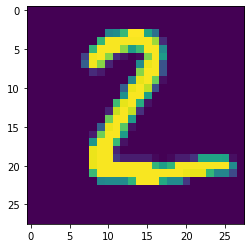

La version avec du bruit


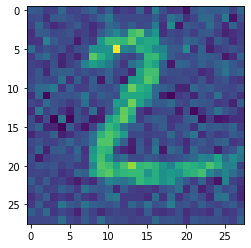

Après le Débruitage


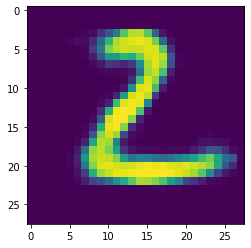

In [ ]:
n = 1
print("L'originale")
plt.imshow(X_test[n])
plt.show()
print("La version avec du bruit")
plt.imshow(ten_noisey_images[n])
plt.show()
print("Après le Débruitage")
plt.imshow(denoised[n])
plt.show()